In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df_cardio = pd.read_csv("cardio_train.csv", sep=";", index_col=0)

In [5]:
df_cardio.info

<bound method DataFrame.info of          age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
id                                                                             
0      18393       2     168    62.0    110     80            1     1      0   
1      20228       1     156    85.0    140     90            3     1      0   
2      18857       1     165    64.0    130     70            3     1      0   
3      17623       2     169    82.0    150    100            1     1      0   
4      17474       1     156    56.0    100     60            1     1      0   
...      ...     ...     ...     ...    ...    ...          ...   ...    ...   
99993  19240       2     168    76.0    120     80            1     1      1   
99995  22601       1     158   126.0    140     90            2     2      0   
99996  19066       2     183   105.0    180     90            3     1      0   
99998  22431       1     163    72.0    135     80            1     2      0   
99999  2

In [6]:
df_cardio.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [7]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots (rows=4, cols=1)

fig.add_trace(go.Box(x=df_cardio["age"] / 365, name="Idade"), row=1, col=1)
fig.add_trace(go.Box(x=df_cardio["weight"], name="Peso"), row=2, col=1)
fig.add_trace(go.Box(x=df_cardio["ap_hi"],name="Pressão sistólica"), row=3, col=1)
fig.add_trace(go.Box(x=df_cardio["ap_lo"],name="Pressão Diastólica"), row=4, col=1)

fig.update_layout(height=700)
fig.show()

In [9]:
from plotly.subplots import make_subplots

fig = make_subplots(rows=2, cols=3)
fig.add_trace(go.Bar(y=df_cardio["gender"].value_counts(), x=["Feminino","Masculino"], name="Genero"), row=1, col=1)
fig.add_trace(go.Bar(y=df_cardio["cholesterol"].value_counts(), x=["Normal","acima do normal","muito acima do normal"], name="Colesterol"), row=1, col=2)
fig.add_trace(go.Bar(y=df_cardio["gluc"].value_counts(), x=["Normal","acima do normal","muito acima do normal"], name="Glicose"), row=1, col=3)
fig.add_trace(go.Bar(y=df_cardio["smoke"].value_counts(), x=["Não Fumante", "Fumante"], name="Fumante"), row=2, col=1)
fig.add_trace(go.Bar(y=df_cardio["alco"].value_counts(), x=["Não Alcolatra", "Alcolatra"], name="Alcolatra"), row=2, col=2)
fig.add_trace(go.Bar(y=df_cardio["active"].value_counts(), x=["Não Ativo","Ativo"], name="Ativo"), row=2, col=3)

fig.update_layout(height=700)
fig.show()

In [10]:
df_cardio["cardio"].value_counts() / df_cardio["cardio"].value_counts().sum()

0    0.5003
1    0.4997
Name: cardio, dtype: float64

<Axes: >

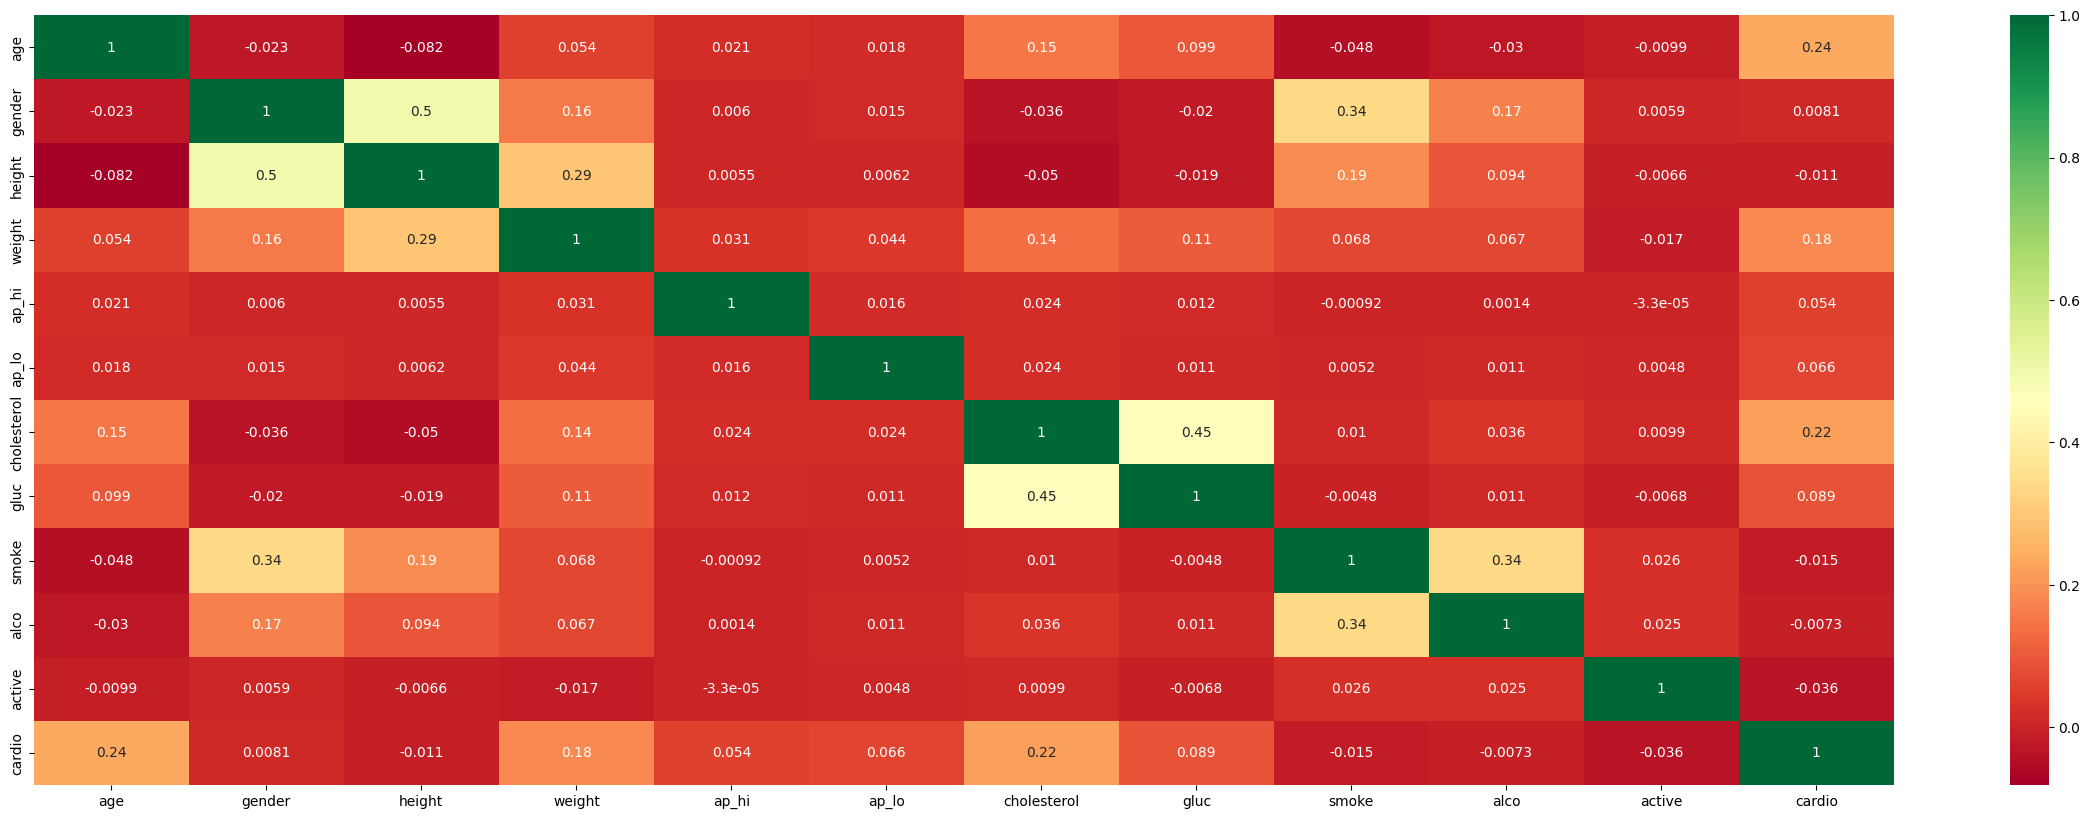

In [11]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(30, 10))
sns.heatmap(df_cardio.corr(), annot=True, cmap="RdYlGn")

In [12]:


Y = df_cardio["cardio"]
X = df_cardio.loc[:, df_cardio.columns != 'cardio']

In [13]:
X

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
id,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1
1,20228,1,156,85.0,140,90,3,1,0,0,1
2,18857,1,165,64.0,130,70,3,1,0,0,0
3,17623,2,169,82.0,150,100,1,1,0,0,1
4,17474,1,156,56.0,100,60,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
99993,19240,2,168,76.0,120,80,1,1,1,0,1
99995,22601,1,158,126.0,140,90,2,2,0,0,1
99996,19066,2,183,105.0,180,90,3,1,0,1,0


In [14]:
Y

id
0        0
1        1
2        1
3        1
4        0
        ..
99993    0
99995    1
99996    1
99998    1
99999    0
Name: cardio, Length: 70000, dtype: int64

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [17]:
from sklearn.ensemble import RandomForestClassifier

ml_model = RandomForestClassifier()
ml_model.fit(x_train, y_train)



RandomForestClassifier()

In [18]:
ml_model.predict(x_test.iloc[500].values.reshape(1, -1))


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names



array([0])

In [19]:
y_test.iloc[0]

1

In [20]:
from sklearn.metrics import classification_report, confusion_matrix


In [21]:
predictions = ml_model.predict(x_test)

In [22]:
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       0.71      0.73      0.72     11506
           1       0.73      0.70      0.71     11594

    accuracy                           0.72     23100
   macro avg       0.72      0.72      0.72     23100
weighted avg       0.72      0.72      0.72     23100

[[8434 3072]
 [3462 8132]]
